In [1]:
import os
project_root = os.path.dirname(os.getcwd())
# os.chdir(project_root)

print(os.getcwd())

C:\Users\nrbha\Git-Codes\Spotify


In [54]:
import pandas as pd
import numpy as np
import configparser
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
# Language Processing Libraries
import re
import sys
sys.path.append(project_root)
from utils.language_cleanup import LanguageCleanup

ModuleNotFoundError: No module named 'indexer'

In [42]:
# Load configuration
config = configparser.ConfigParser()
config_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'config.ini'))
config.read('config.ini')



tracks_df = pd.read_csv(config['files']['track_playlist_genre'])

## Main File

In [5]:
tracks_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
tracks_df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [7]:
preferred_column_list=['track_id','track_name','track_artist','track_popularity','track_album_id','track_album_name','track_album_release_date','playlist_name','playlist_id','playlist_genre', 'playlist_subgenre']

In [8]:
tracks_playlist_genre_df = tracks_df[preferred_column_list]

In [9]:
tracks_playlist_genre_df.dtypes

track_id                    object
track_name                  object
track_artist                object
track_popularity             int64
track_album_id              object
track_album_name            object
track_album_release_date    object
playlist_name               object
playlist_id                 object
playlist_genre              object
playlist_subgenre           object
dtype: object

In [10]:
tracks_playlist_genre_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop


In [11]:
tracks_playlist_genre_df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
dtype: int64

In [12]:
tracks_playlist_genre_df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
dtype: int64

In [13]:
tracks_playlist_genre_df.rename(columns={
    'track_id':'Track_ID',
    'track_name':'Name',
    'track_artist':'Artist',
    'track_popularity':'Popularity',
    'track_album_id':'Album_ID',
    'track_album_name':'Album_Name',
    'track_album_release_date':'Album_R_Date',
    'playlist_id':'Playlist_ID',
    'playlist_name':'Playlist_Name',
    'playlist_genre':'Playlist_Genre',
    'playlist_subgenre':'PL_Sub_Genre'}, inplace=True )



tracks_playlist_genre_df['Album_R_Year']= pd.to_datetime(tracks_playlist_genre_df['Album_R_Date'], format='%Y%m%d', infer_datetime_format=True).apply(
    lambda row: dt.strftime(row,'%Y'))

C:\Users\nrbha\AppData\Local\Temp\ipykernel_11000\3122954827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_playlist_genre_df.rename(columns={
C:\Users\nrbha\AppData\Local\Temp\ipykernel_11000\3122954827.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_playlist_genre_df['Album_R_Year']= pd.to_datetime(tracks_playlist_genre_df['Album_R_Date'], format='%Y%m%d', infer_datetime_format=True).apply(


In [14]:
tracks_playlist_genre_df.head()

,Track_ID,Name,Artist,Popularity,Album_ID,Album_Name,Album_R_Date,Playlist_Name,Playlist_ID,Playlist_Genre,PL_Sub_Genre,Album_R_Year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,2019


In [15]:
pd.DataFrame(tracks_playlist_genre_df['Playlist_Name'].unique())

,0
0,Pop Remix
1,Dance Pop
2,Dance Room
3,Cardio
4,Dance Pop Hits
...,...
444,Fresh EDM | Progressive House | Electro House ...
445,"Festival Music 2019 - Warm Up Music (EDM, Big ..."
446,Underground Party | Hypnotic | Minimal | Acid ...
447,Trending EDM by Nik Cooper


In [16]:
# Separating this one dataframe into two parts, one with track_playlist_genre columns and other one with album_playlist_genre columns 

album_playlist_genre_df = tracks_playlist_genre_df[['Album_ID','Album_Name','Album_R_Date','Album_R_Year','Playlist_ID','Playlist_Name','Playlist_Genre','PL_Sub_Genre']]

tracks_playlist_genre_df= tracks_playlist_genre_df[['Track_ID','Name','Artist','Popularity','Album_R_Year','Playlist_ID','Playlist_Name','Playlist_Genre','PL_Sub_Genre']]

tracks_playlist_genre_df.rename( columns={'Album_R_Year':'Track_R_Year'})

,Track_ID,Name,Artist,Popularity,Track_R_Year,Playlist_ID,Playlist_Name,Playlist_Genre,PL_Sub_Genre
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2014,6jI1gFr6ANFtT8MmTvA2Ux,♥ EDM LOVE 2020,edm,progressive electro house
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,2013,6jI1gFr6ANFtT8MmTvA2Ux,♥ EDM LOVE 2020,edm,progressive electro house
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,2014,6jI1gFr6ANFtT8MmTvA2Ux,♥ EDM LOVE 2020,edm,progressive electro house
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,2014,6jI1gFr6ANFtT8MmTvA2Ux,♥ EDM LOVE 2020,edm,progressive electro house


In [17]:
album_playlist_genre_df.head()

,Album_ID,Album_Name,Album_R_Date,Album_R_Year,Playlist_ID,Playlist_Name,Playlist_Genre,PL_Sub_Genre
0,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
1,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
2,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
3,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
4,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop


In [18]:
tracks_playlist_genre_df.head()

,Track_ID,Name,Artist,Popularity,Album_R_Year,Playlist_ID,Playlist_Name,Playlist_Genre,PL_Sub_Genre
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop


In [19]:
# Saving these clean datasets as a file

tracks_playlist_genre_df.to_csv(config['directories']['clean_data']+"tracks_playlist_genre_data.csv", index=False)
album_playlist_genre_df.to_csv(config['directories']['clean_data']+"album_playlist_genre_data.csv", index=False)

## Tracks, Playlist and Playlist Genre data created in the last step of Main File section

In [20]:
tracks_playlist_genre_df.head()

,Track_ID,Name,Artist,Popularity,Album_R_Year,Playlist_ID,Playlist_Name,Playlist_Genre,PL_Sub_Genre
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop


In [21]:
tracks_playlist_genre_df.shape

(32833, 9)

In [22]:
tracks_playlist_genre_df.isnull().sum()

Track_ID          0
Name              5
Artist            5
Popularity        0
Album_R_Year      0
Playlist_ID       0
Playlist_Name     0
Playlist_Genre    0
PL_Sub_Genre      0
dtype: int64

In [23]:
tracks_playlist_genre_df[tracks_playlist_genre_df['Name'].isnull()]

,Track_ID,Name,Artist,Popularity,Album_R_Year,Playlist_ID,Playlist_Name,Playlist_Genre,PL_Sub_Genre
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,2012,5DyJsJZOpMJh34WvUrQzMV,HIP&HOP,rap,southern hip hop
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,2017,5GA8GDo7RQC3JEanT81B3g,GANGSTA Rap,rap,gangster rap
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,2017,5GA8GDo7RQC3JEanT81B3g,GANGSTA Rap,rap,gangster rap
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,2012,0si5tw70PIgPkY1Eva6V8f,Reggaeton viejito🔥,latin,reggaeton
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,2012,3nH8aytdqNeRbcRCg3dw9q,latin hip hop,latin,latin hip hop


In [24]:
# replacing these with 'Unknown'
tracks_playlist_genre_df.fillna(value='Unknown', axis=1, inplace=True)

In [25]:
tracks_playlist_genre_df.isna().sum()

Track_ID          0
Name              0
Artist            0
Popularity        0
Album_R_Year      0
Playlist_ID       0
Playlist_Name     0
Playlist_Genre    0
PL_Sub_Genre      0
dtype: int64

In [26]:
tracks_playlist_genre_df.nunique()

Track_ID          28356
Name              23450
Artist            10693
Popularity          101
Album_R_Year         63
Playlist_ID         471
Playlist_Name       449
Playlist_Genre        6
PL_Sub_Genre         24
dtype: int64

In [27]:
# the shape of the dataframe is (32833, 9) and unique track id is 28356 and 471 unique playlist.
# Creating a new column "Combined_Id" = Track_Id+Playlist_ID

In [28]:
tracks_playlist_genre_df['Combined_ID'] = tracks_playlist_genre_df['Track_ID']+'_'+tracks_playlist_genre_df['Playlist_ID']

In [29]:
tracks_playlist_genre_df.nunique()

Track_ID          28356
Name              23450
Artist            10693
Popularity          101
Album_R_Year         63
Playlist_ID         471
Playlist_Name       449
Playlist_Genre        6
PL_Sub_Genre         24
Combined_ID       32251
dtype: int64

In [30]:
# Combined unique ids are 32251 and total are 32833 
# duplicate count 582+582=1164

In [31]:
agg_df = tracks_playlist_genre_df.groupby(['Track_ID']).agg(
    {
        'Playlist_ID':'nunique',
        'Combined_ID':'nunique'
    }
)

agg_df[agg_df['Playlist_ID']!=agg_df['Combined_ID']]

,Playlist_ID,Combined_ID
Track_ID,,


In [32]:
tracks_playlist_genre_df.head()

,Track_ID,Name,Artist,Popularity,Album_R_Year,Playlist_ID,Playlist_Name,Playlist_Genre,PL_Sub_Genre,Combined_ID
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop,6f807x0ima9a1j3VPbc7VN_37i9dQZF1DXcZDD7cfEKhW
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop,0r7CVbZTWZgbTCYdfa2P31_37i9dQZF1DXcZDD7cfEKhW
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop,1z1Hg7Vb0AhHDiEmnDE79l_37i9dQZF1DXcZDD7cfEKhW
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop,75FpbthrwQmzHlBJLuGdC7_37i9dQZF1DXcZDD7cfEKhW
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop,1e8PAfcKUYoKkxPhrHqw4x_37i9dQZF1DXcZDD7cfEKhW


### Some Language cleanup

In [33]:
track_name = tracks_playlist_genre_df[['Track_ID','Name']]
track_name.head()

,Track_ID,Name
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix


In [34]:


# Create an instance of LanguageCleanup
lc = LanguageCleanup()

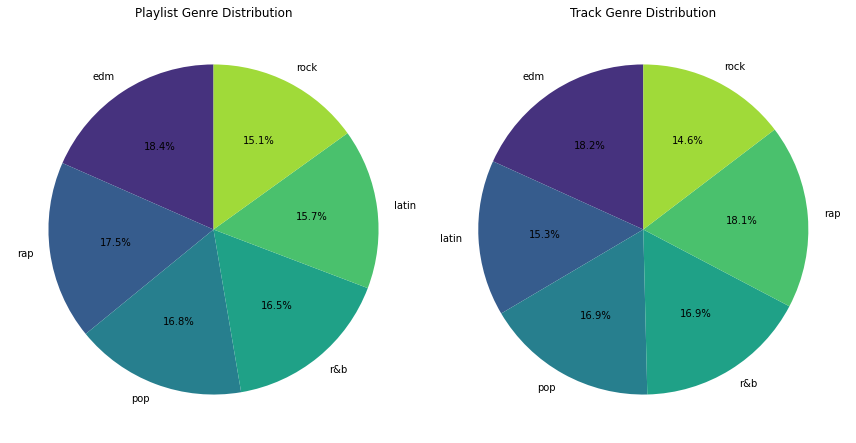

In [51]:
# Data Setup for graphs
playlist_genre = tracks_playlist_genre_df['Playlist_Genre'].value_counts()
track_genre = tracks_playlist_genre_df.groupby(['Playlist_Genre']).agg({'Track_ID':'nunique'})
plt.rcParams["figure.figsize"] = tuple(int(s) for s in (config['settings']['fig_size_medium'].strip("()").split(',')))

# Color palette setup for graph
playlist_genre_colors = sns.color_palette('viridis', len(playlist_genre))
track_genre_colors = sns.color_palette('viridis', len(track_genre))

# Create a single figure with two axes (subplots)
fig, (ax1, ax2) = plt.subplots(1, 2)

# Subplot 1: Left
ax1.pie(playlist_genre, labels=playlist_genre.index, autopct='%1.1f%%', colors=playlist_genre_colors, startangle=90)
ax1.set_title("Playlist Genre Distribution")

# Subplot 2: Right
ax2.pie(track_genre['Track_ID'], labels=track_genre.index, autopct='%1.1f%%', colors=track_genre_colors, startangle=90)
ax2.set_title("Track Genre Distribution")

# Adjust aspect ratio to make the pie charts appear circular
ax1.set_aspect('equal')
ax2.set_aspect('equal')

# Apply tight layout to ensure proper spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Cleanup unnecessary variables
del playlist_genre, playlist_genre_colors, track_genre, track_genre_colors

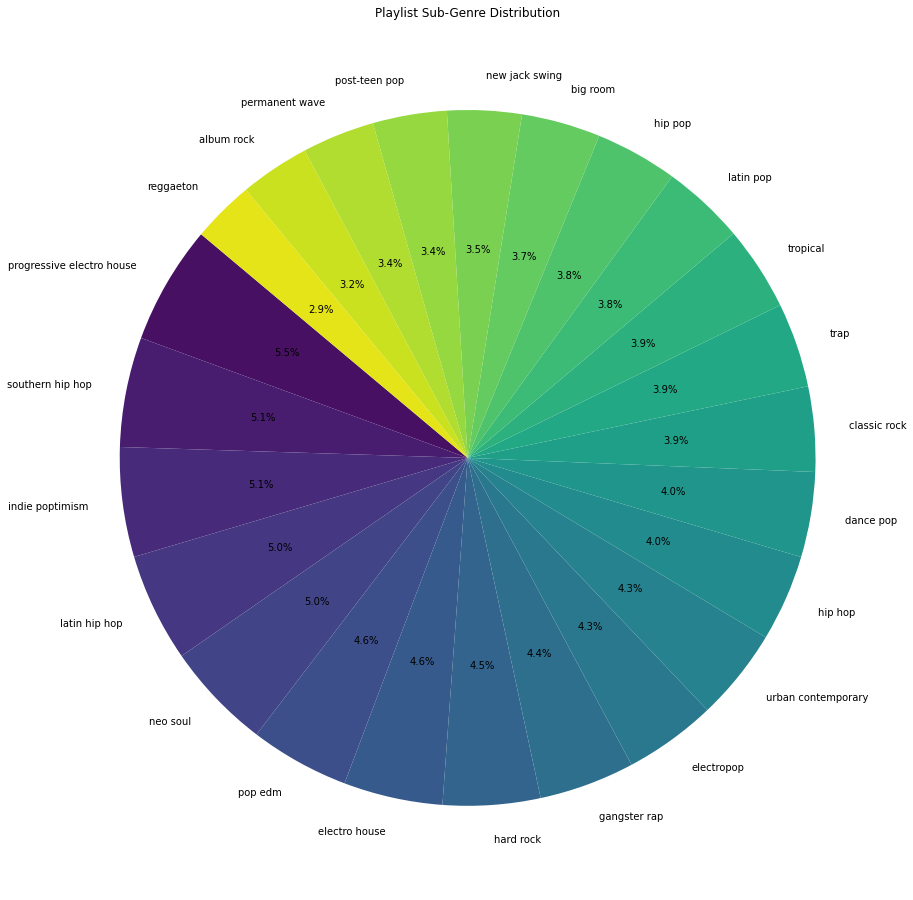

In [46]:
data = tracks_playlist_genre_df['PL_Sub_Genre'].value_counts()
plt.rcParams["figure.figsize"] = tuple(int(s) for s in (config['settings']['fig_size_xxlarge'].strip("()").split(',')))
# Create pie chart
colors = sns.color_palette('viridis', len(data))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Add title
plt.title('Playlist Sub-Genre Distribution')
plt.show()

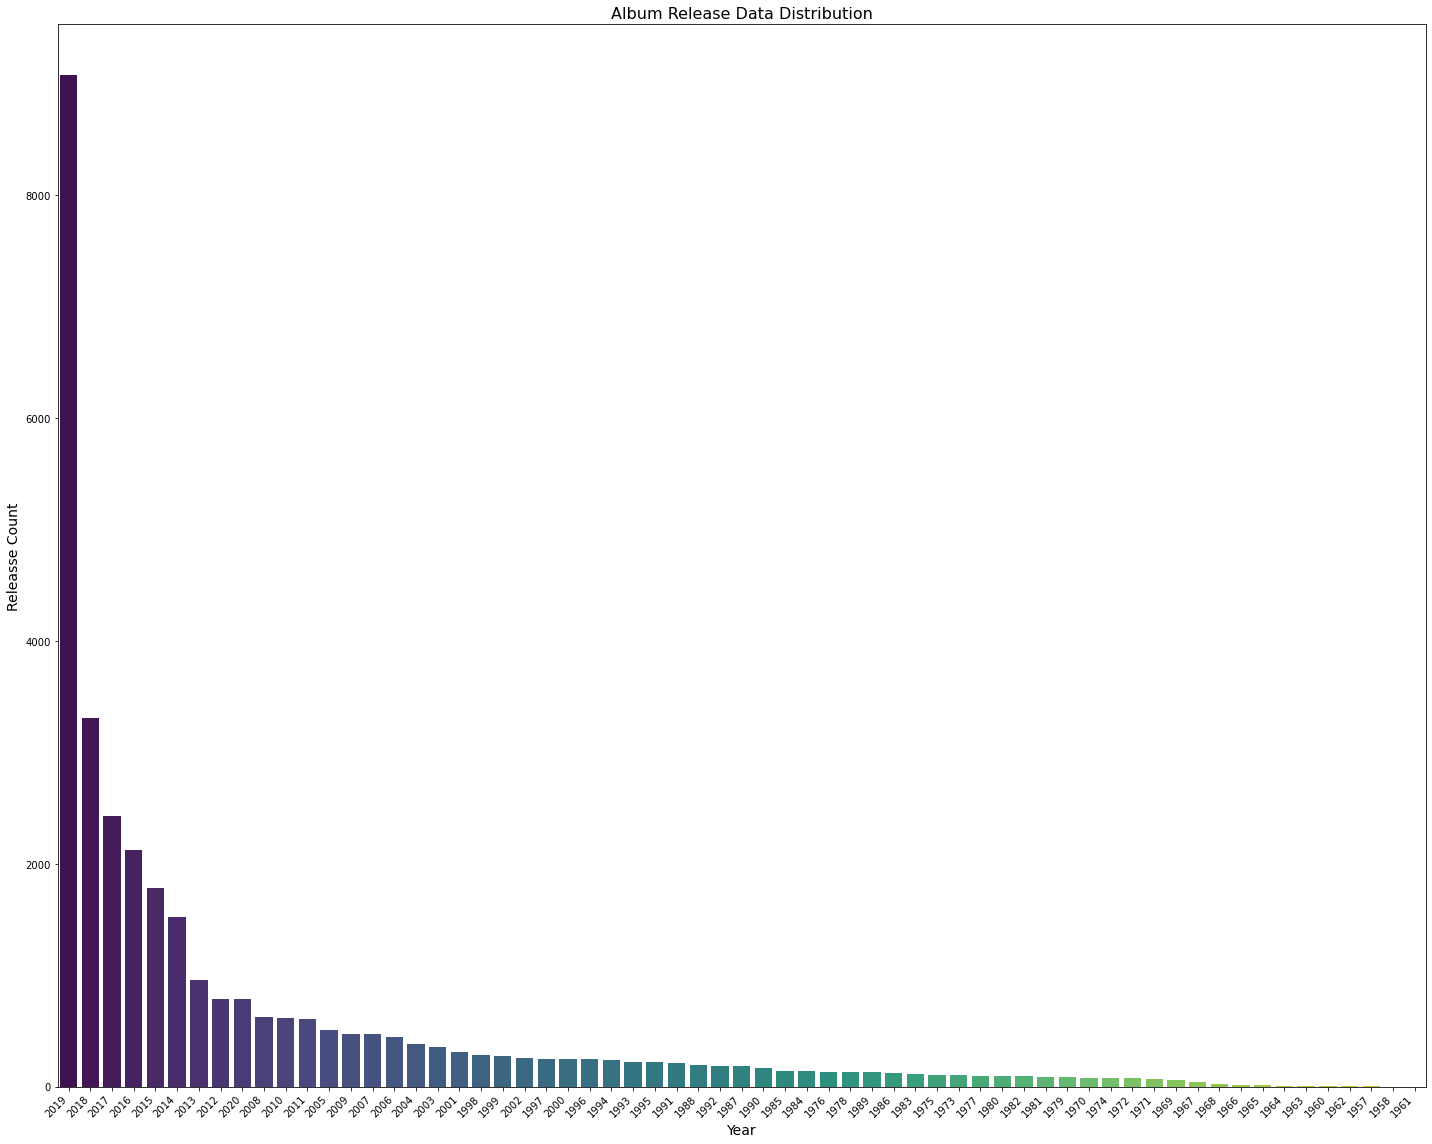

In [37]:
data = tracks_playlist_genre_df['Album_R_Year'].value_counts()
# Create bar plot
sns.barplot(x =data.index, y=data.values, palette='viridis')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Releasse Count', fontsize=14)
plt.title('Album Release Data Distribution', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()

## Albums, Playlist and Playlist Genre data created in the last step of Main File section

In [38]:
album_playlist_genre_df.head()

,Album_ID,Album_Name,Album_R_Date,Album_R_Year,Playlist_ID,Playlist_Name,Playlist_Genre,PL_Sub_Genre
0,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
1,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
2,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
3,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop
4,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,2019,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,pop,dance pop


In [39]:
album_playlist_genre_df.shape

(32833, 8)

In [40]:
album_playlist_genre_df.nunique()

Album_ID          22545
Album_Name        19743
Album_R_Date       4530
Album_R_Year         63
Playlist_ID         471
Playlist_Name       449
Playlist_Genre        6
PL_Sub_Genre         24
dtype: int64